# 🚢 Titanic Dataset – Exploratory Data Analysis (EDA)

**Project:** Titanic Survival Prediction  
**Objective:** Understand data patterns, relationships, and factors affecting survival.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("../data/raw/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Dataset Overview
- Rows represent passengers
- Columns represent passenger attributes
- Target variable: **Survived**


In [ ]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 🧩 Missing Values Analysis
Understanding which features have missing values and how many.


In [10]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🎯 Survival Distribution


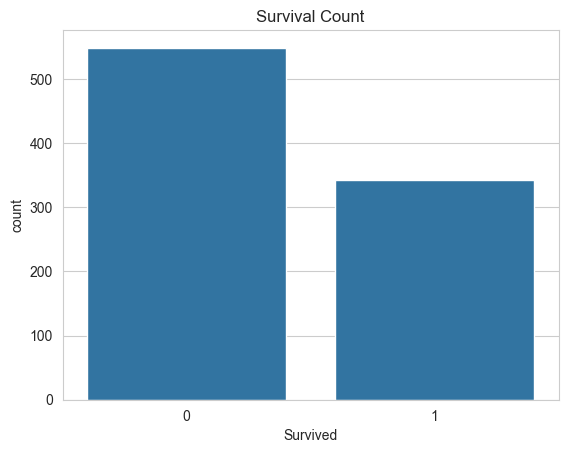

In [11]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


## 👨‍🦱👩 Gender vs Survival


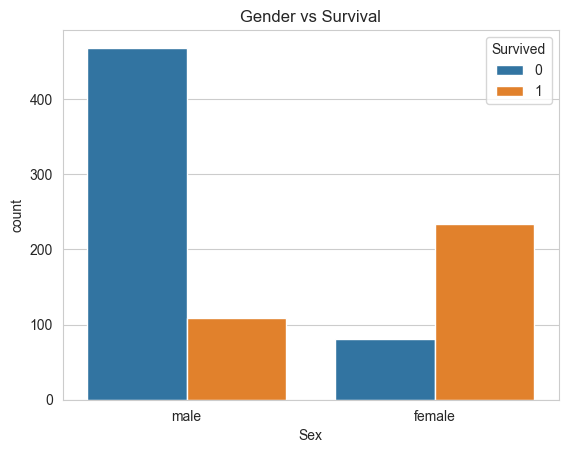

In [12]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Gender vs Survival")
plt.show()


## 🎟️ Passenger Class vs Survival


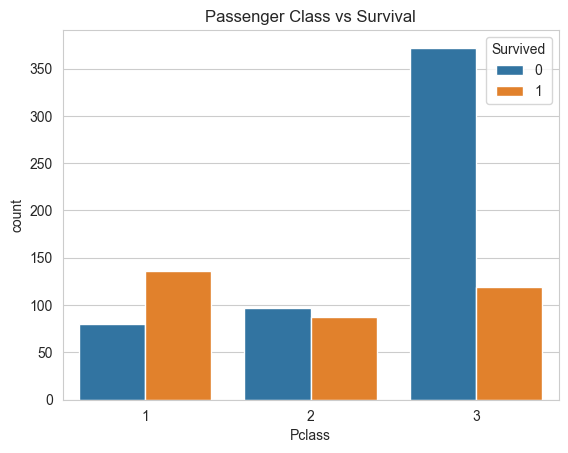

In [13]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Passenger Class vs Survival")
plt.show()


## 🎂 Age Distribution


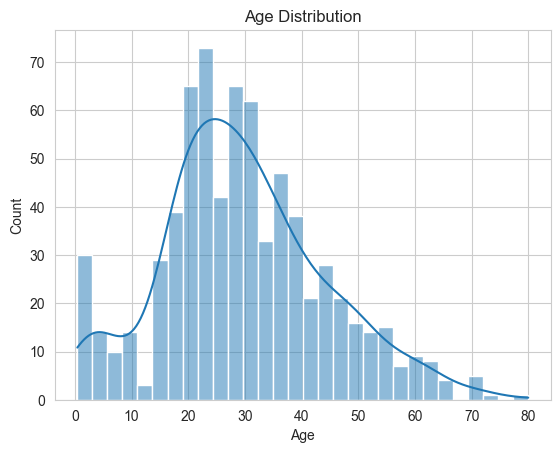

In [14]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


## 🔗 Feature Correlation


In [ ]:
# Select numeric columns only
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Handle missing values
numeric_df = numeric_df.dropna()

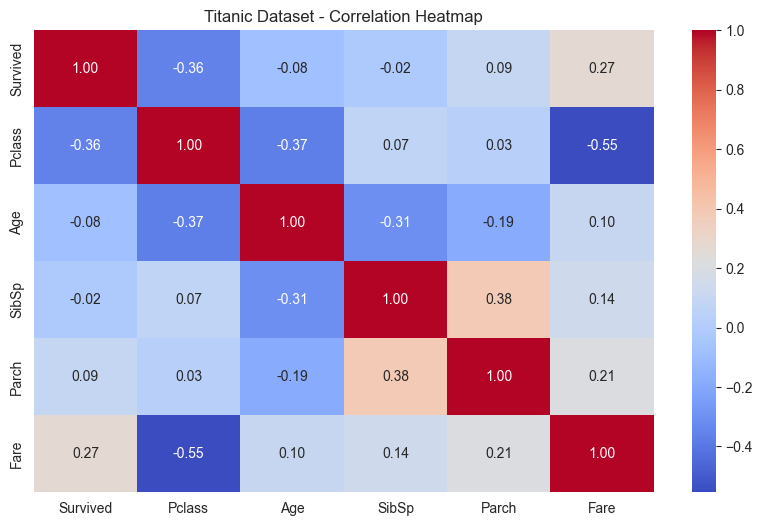

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Titanic Dataset - Correlation Heatmap")
plt.show()


## 🔍 Key EDA Insights

- Female passengers had a significantly higher survival rate than males.
- Passengers in higher classes (Pclass 1) had better chances of survival.
- Age and fare showed meaningful patterns with survival probability.
- Missing values in Age and Embarked required preprocessing before modeling.
